# Alucar - Analisando as vendas

In [0]:
import pandas as pd

In [133]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [0]:
alucar = pd.read_csv('alucar.csv')

In [135]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [136]:
print('Quantidades de dados nulos:', alucar.isna().sum().sum())

Quantidades de dados nulos: 0


In [137]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [0]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [139]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [140]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [141]:
print(sns.__version__)

0.9.0


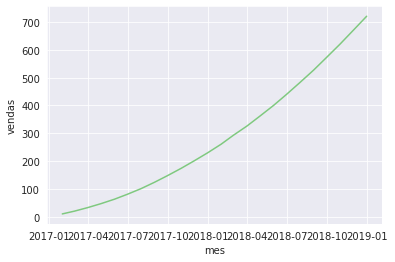

In [142]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

In [0]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

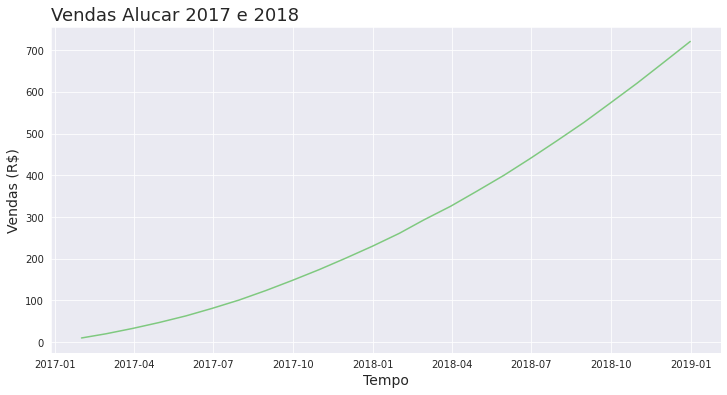

In [144]:
ax = sns.lineplot(x= 'mes',y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)

ax = ax

In [0]:
alucar['aumento'] = alucar['vendas'].diff()

In [146]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


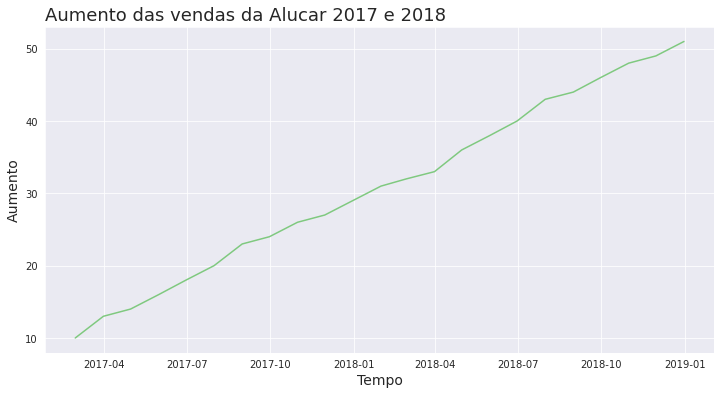

In [147]:
ax = sns.lineplot(x= 'mes',y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)

ax = ax

In [0]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x= x,y = y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

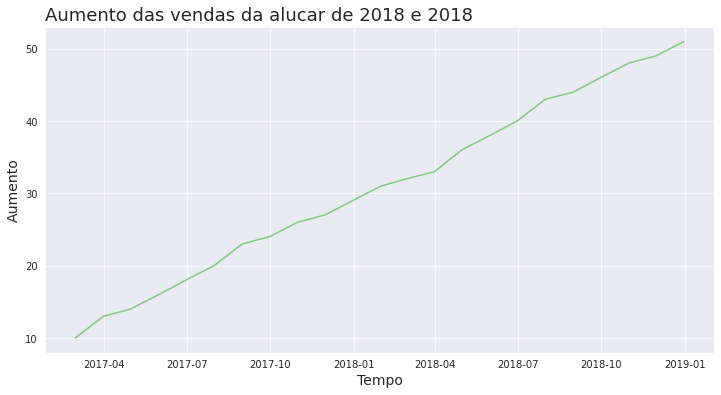

In [149]:
plotar('Aumento das vendas da alucar de 2018 e 2018', 'Tempo','Aumento','mes','aumento',alucar)

In [150]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


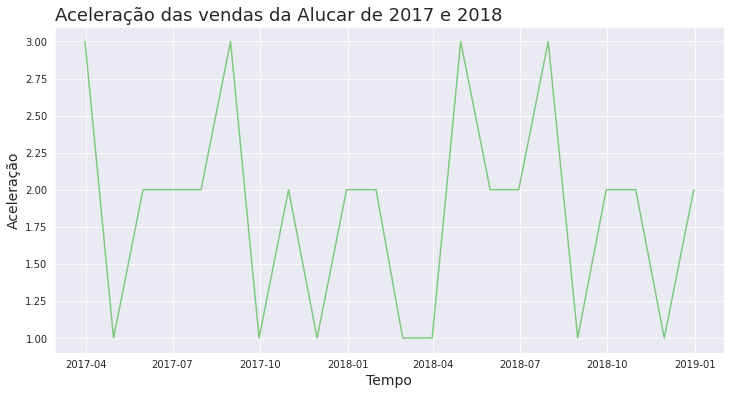

In [151]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao', alucar)

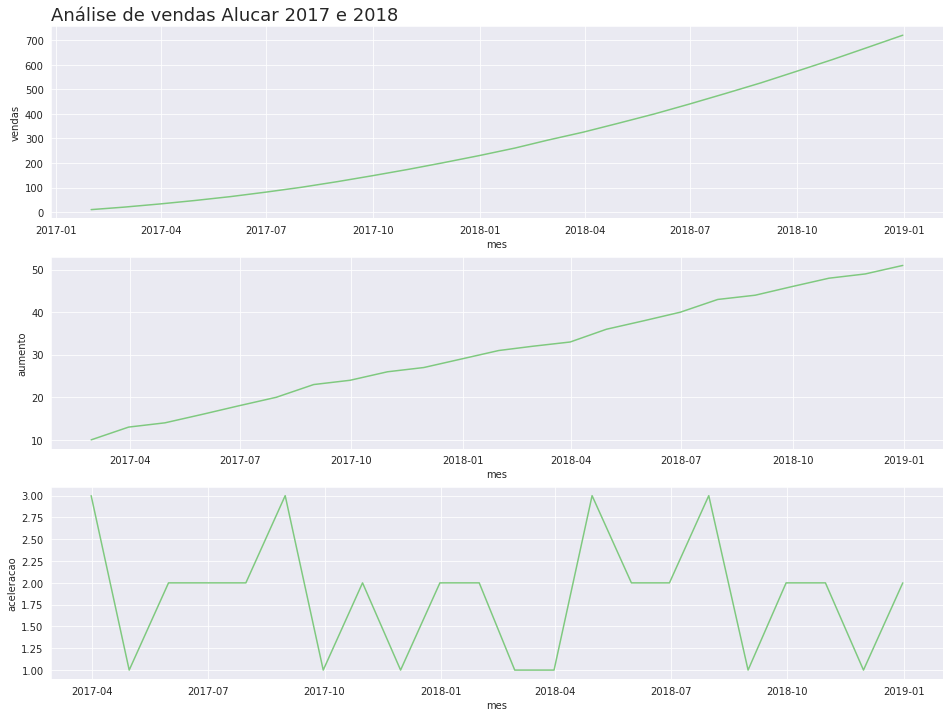

In [152]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas Alucar 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [0]:
def plotcomparacao(x,y1,y2,y3, dataset,titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc='left')
  sns.lineplot(x = x, y = y1 , data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

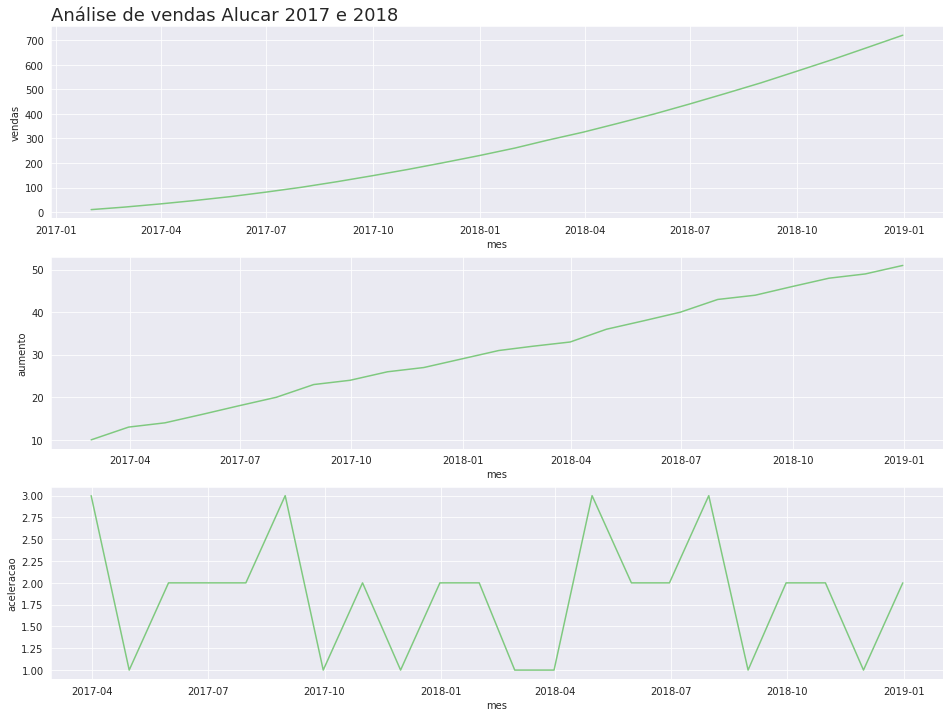

In [154]:
plotcomparacao('mes','vendas','aumento','aceleracao',alucar,'Análise de vendas Alucar 2017 e 2018')

In [0]:
from pandas.plotting import autocorrelation_plot

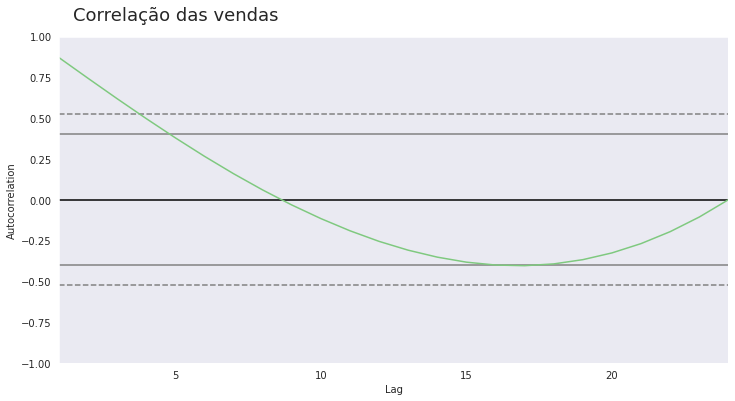

In [156]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

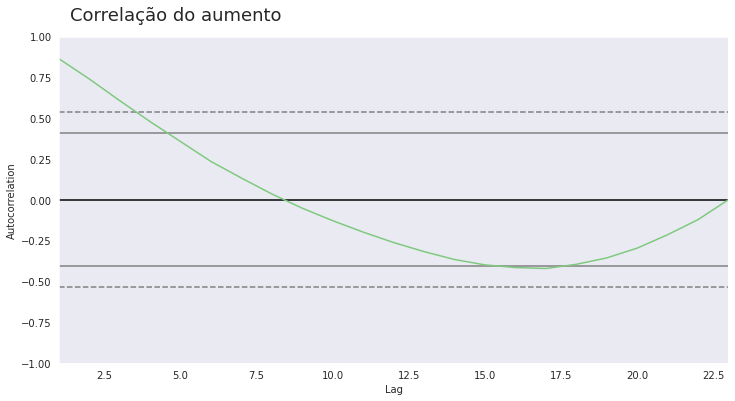

In [157]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

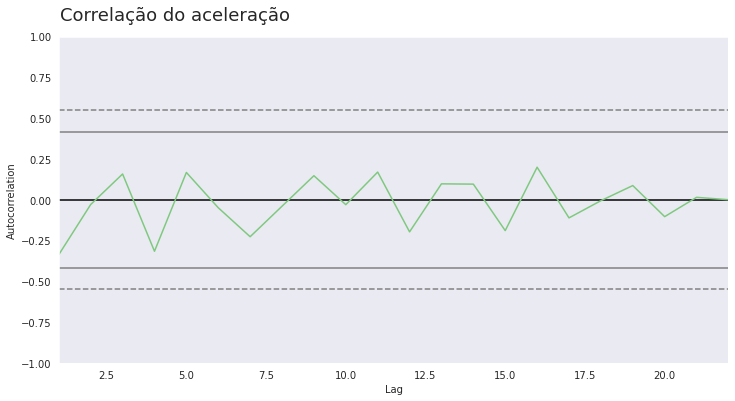

In [158]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da Newsletter

In [159]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [160]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [161]:
print('Quantidades de linhas e colunos:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidades de linhas e colunos: (24, 2)
Quantidade de dados nulos: 0


In [0]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [163]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [0]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [165]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


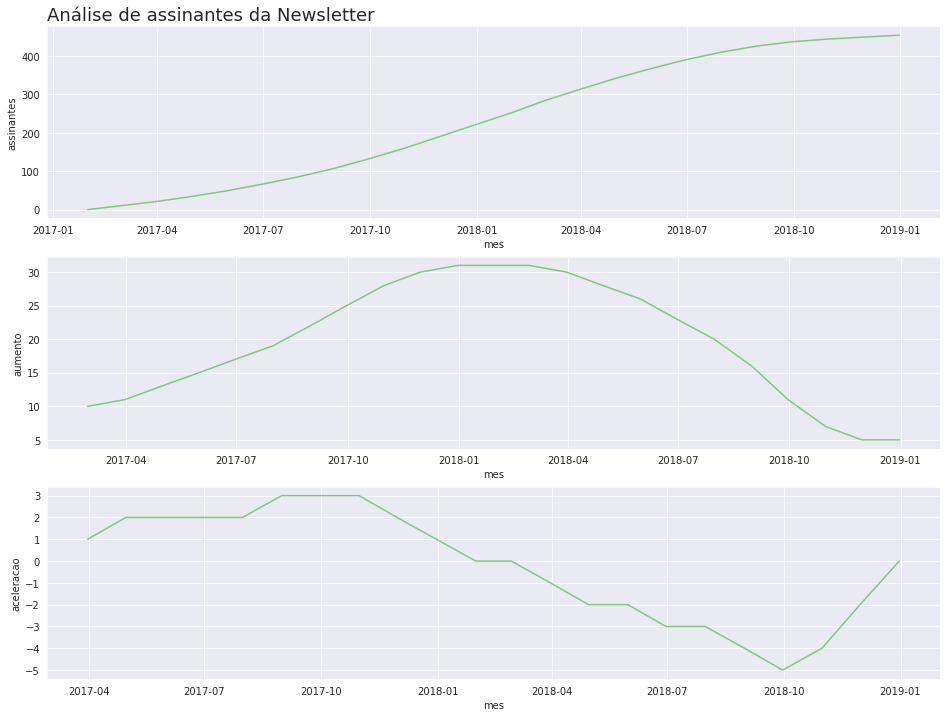

In [166]:
plotcomparacao('mes','assinantes','aumento','aceleracao', assinantes, 'Análise de assinantes da Newsletter')

# Chocolura - Analisando as vendas



In [167]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [168]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [0]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [170]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [171]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [172]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


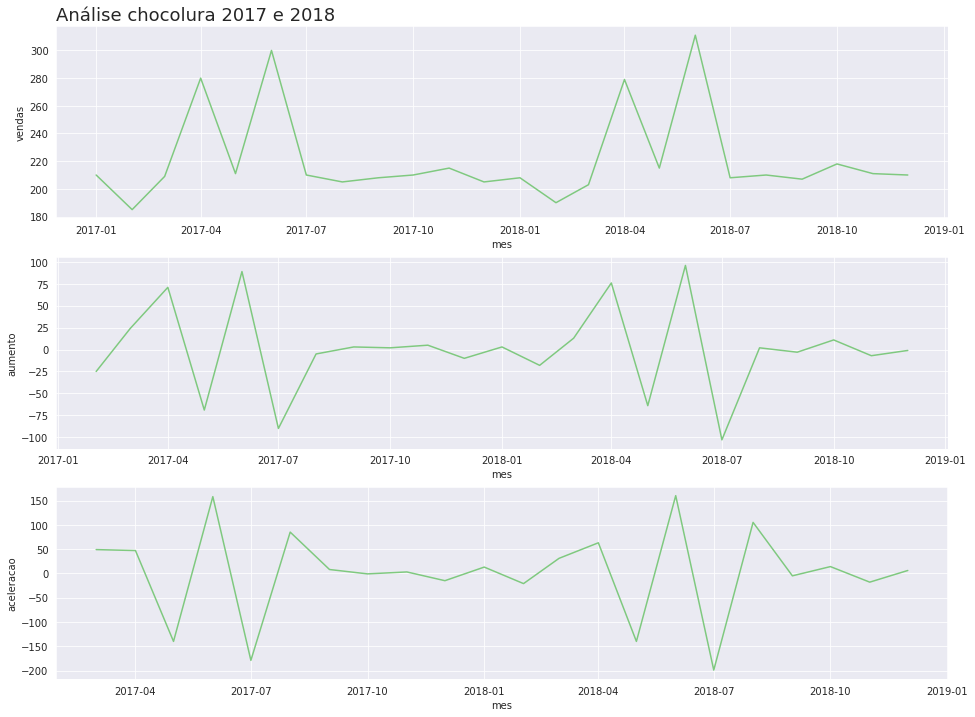

In [173]:
plotcomparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise chocolura 2017 e 2018')

# Chocolura - Vendas diárias (Outubor e Novembro)

In [174]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [175]:
print('Quantidades de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidades de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [176]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [0]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [0]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()

In [0]:
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [180]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


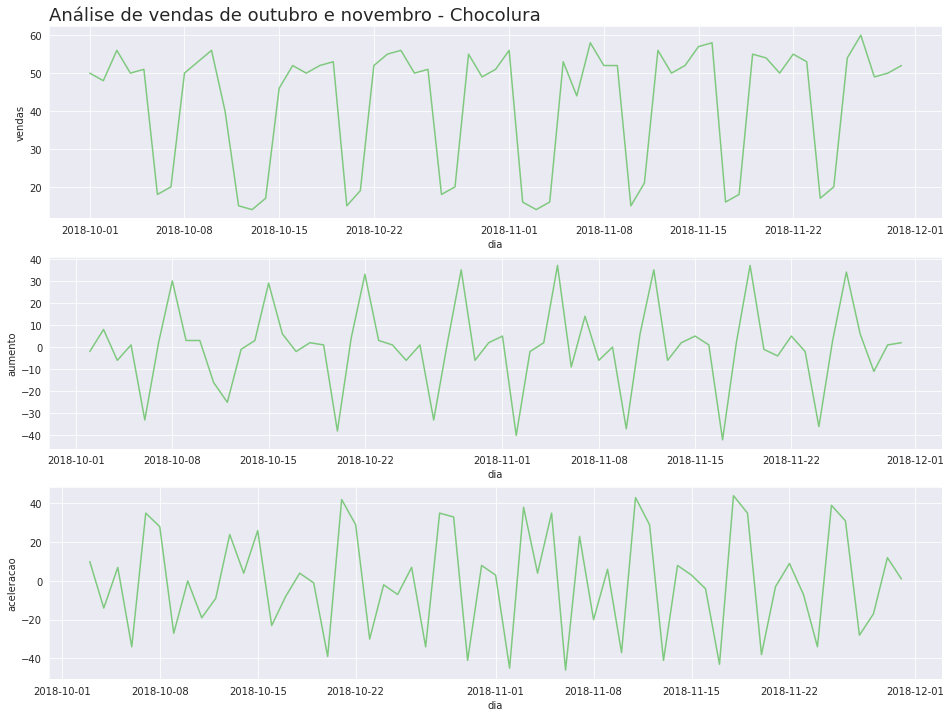

In [181]:
plotcomparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de vendas de outubro e novembro - Chocolura')

**Analisando a sazonalidade**

In [0]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [184]:
vendas_por_dia.head() 

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [185]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [0]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [0]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [189]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


**Agrupando por dias**

In [192]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [193]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

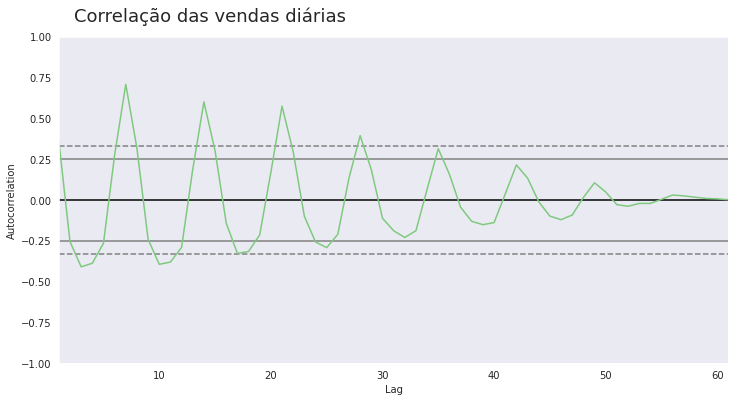

In [194]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize =18, x = 0.3, y= 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

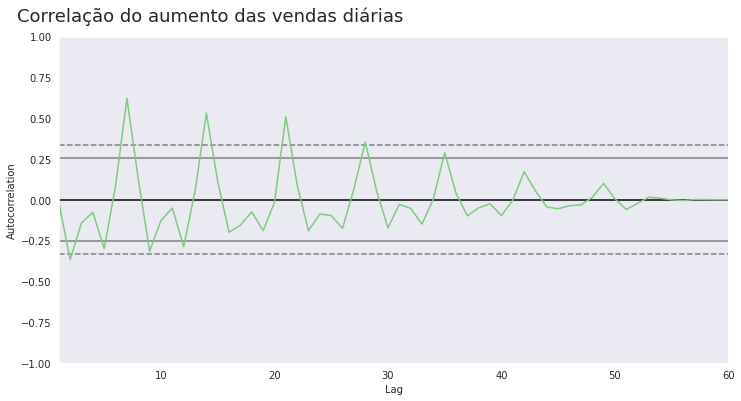

In [195]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias',fontsize =18, x = 0.3, y= 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

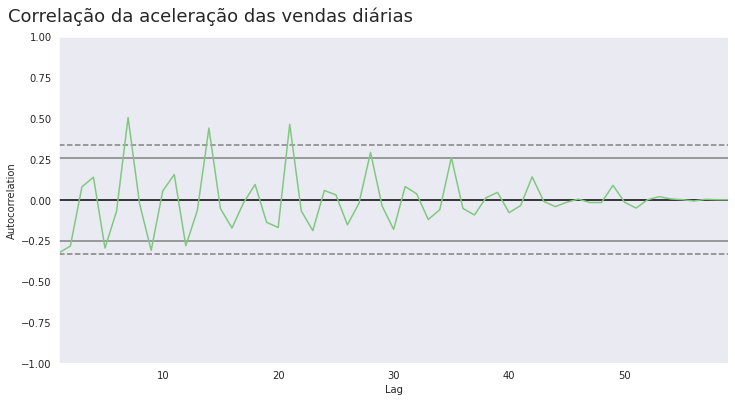

In [196]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias',fontsize =18, x = 0.3, y= 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [197]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [198]:
cafelura['mes'] = pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [200]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


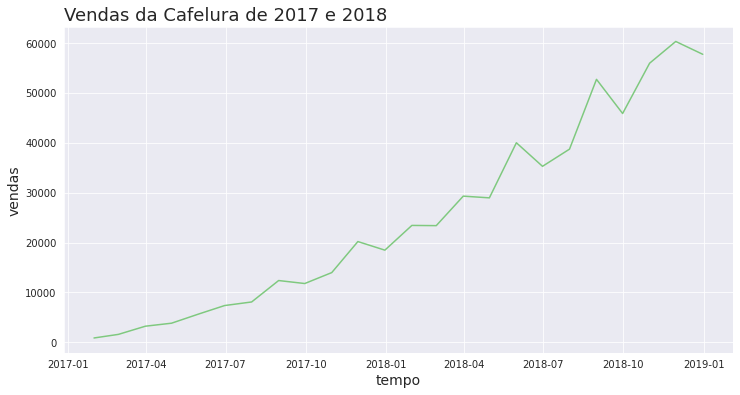

In [201]:
plotar('Vendas da Cafelura de 2017 e 2018','tempo','vendas','mes','vendas', cafelura)

In [202]:
qtd_de_dias_fds = pd.read_csv('dias_final_de_semana.csv')
qtd_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [203]:
qtd_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [204]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtd_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


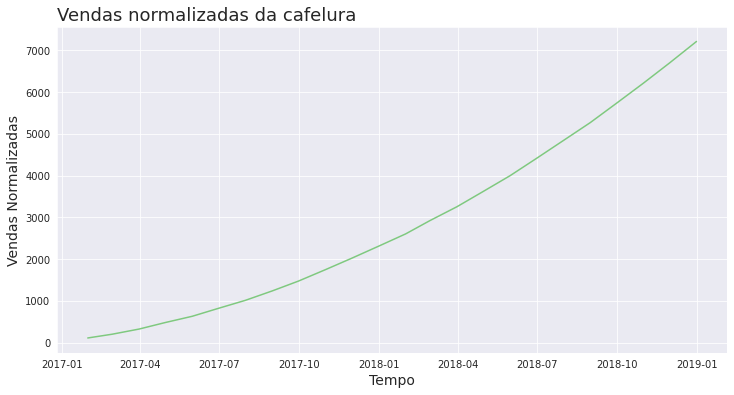

In [205]:
plotar('Vendas normalizadas da cafelura','Tempo','Vendas Normalizadas','mes','vendas_normalizadas',cafelura)

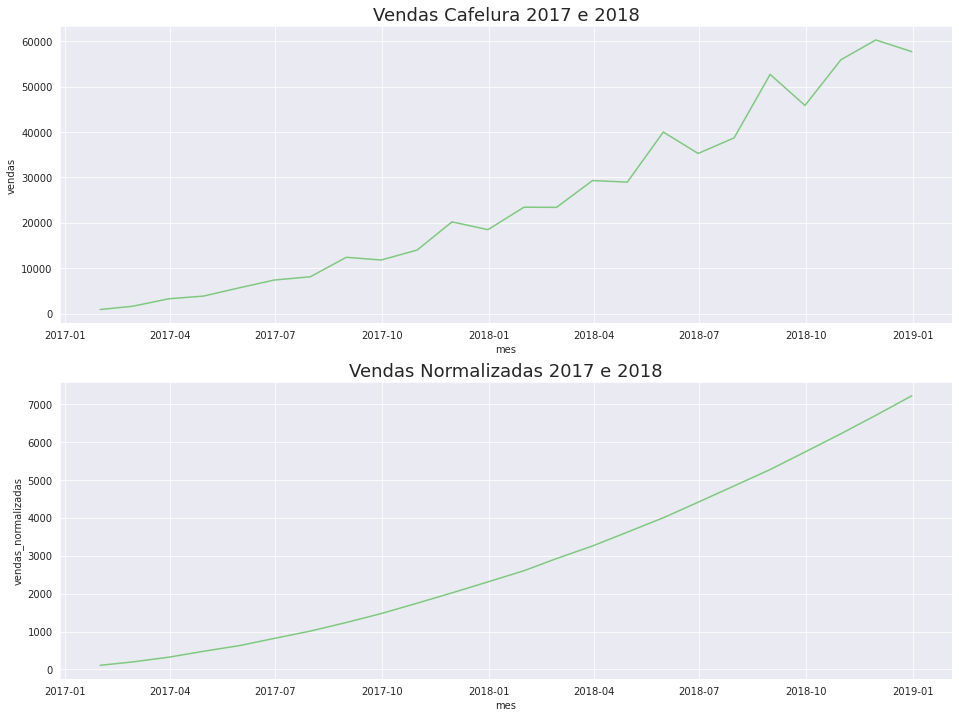

In [207]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes',y='vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes',y='vendas_normalizadas', data = cafelura)
ax = ax


# Statsmodels

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

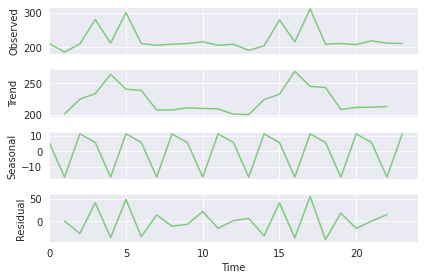

In [212]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [0]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [219]:
data = ({'observacao': observacao,
         'tendencia': tendencia,
         'sazonalidade': sazonalidade,
         'ruido':ruido})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


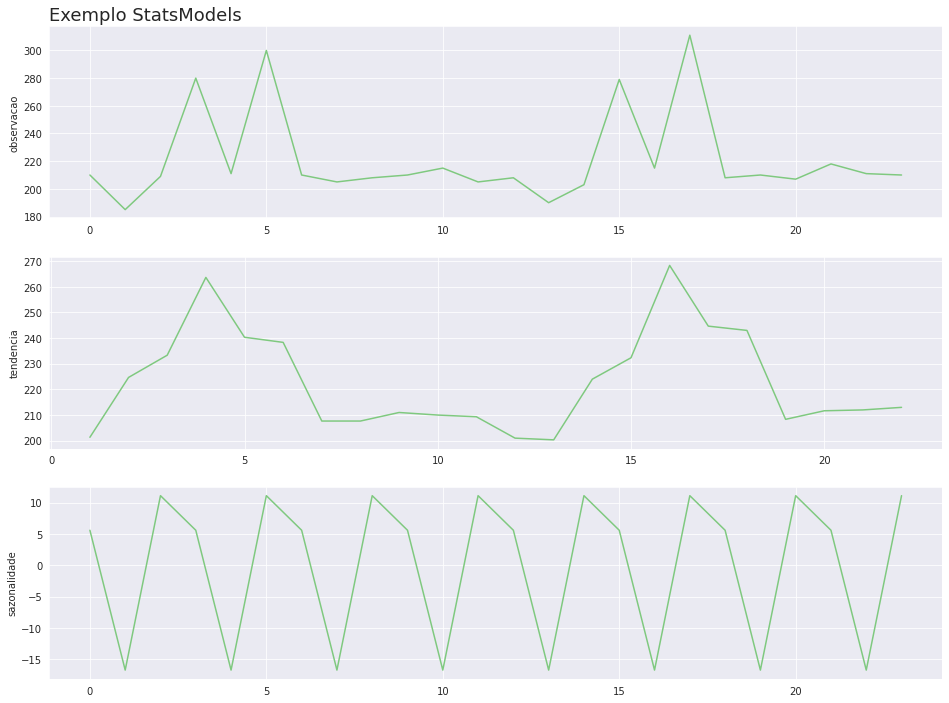

In [220]:
plotcomparacao(resultado.index,'observacao','tendencia','sazonalidade',resultado,'Exemplo StatsModels')

# Alucel - Análise de vendas

In [221]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [222]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [224]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [225]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [226]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


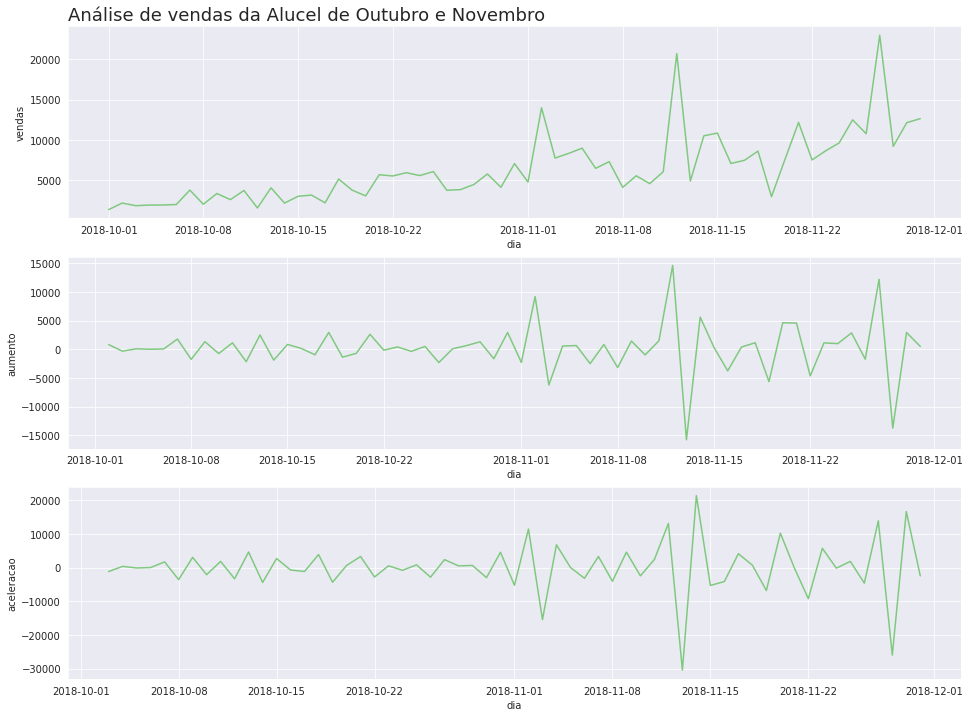

In [228]:
plotcomparacao('dia','vendas','aumento','aceleracao',alucel,'Análise de vendas da Alucel de Outubro e Novembro')

**Média móvel**

In [0]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [0]:
alucel.head(10)

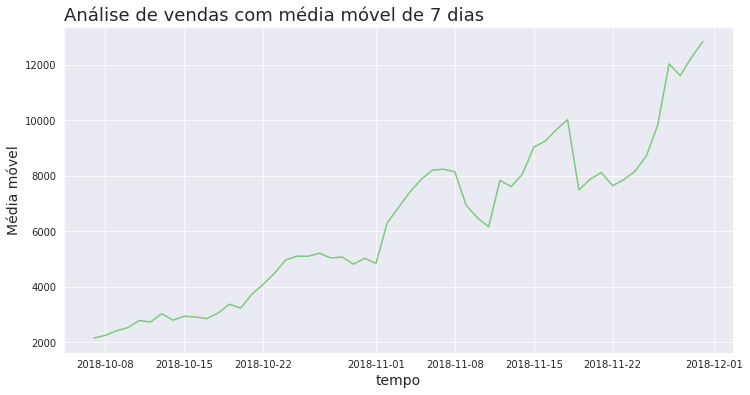

In [233]:
plotar('Análise de vendas com média móvel de 7 dias',
       'tempo','Média móvel','dia','media_movel', alucel)

In [0]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()

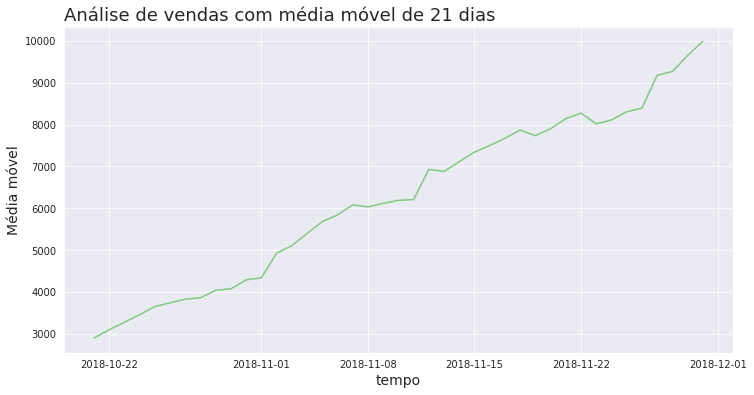

In [235]:
plotar('Análise de vendas com média móvel de 21 dias',
       'tempo','Média móvel','dia','media_movel_21', alucel)

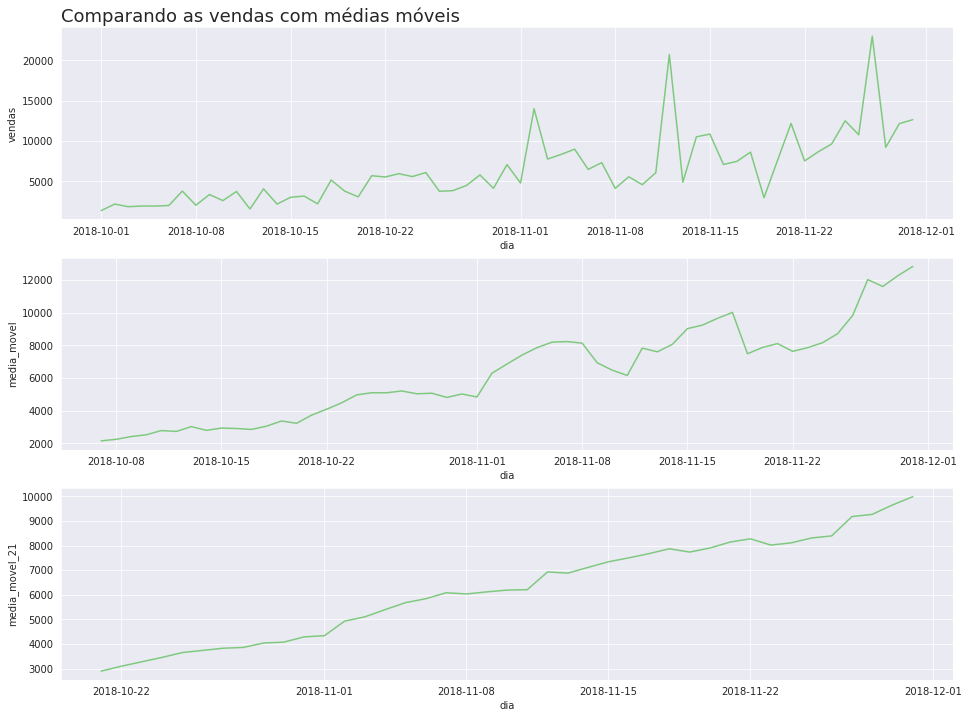

In [237]:
plotcomparacao('dia','vendas','media_movel','media_movel_21', alucel, 'Comparando as vendas com médias móveis')